In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,"Макс. ПДЗ за Y-1 год, дней","Сред. ПДЗ за Y-1 год, дней","Кол-во просрочек свыше 5-ти дней за Y-1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за Y-1 год, руб.","Кол-во раз ПДЗ за Y-1 год, шт.",Итого,"Y-4, Нематериальные активы, RUB","Y-3, Нематериальные активы, RUB","Y-2, Нематериальные активы, RUB","Y-1, Нематериальные активы, RUB",...,"Y-1, Прибыль (убыток) до налогообложения , RUB","Y-4, Прибыль (убыток) от продажи, RUB","Y-3, Прибыль (убыток) от продажи, RUB","Y-2, Прибыль (убыток) от продажи, RUB","Y-1, Прибыль (убыток) от продажи, RUB",Факт просрочки,Просрочка более 30 дней,Просрочка 0-30,"Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб."
0,0,0.0,0,0.000000,0,10.0,2.895541e+06,6.245860e+06,9.050955e+06,9.885987e+06,...,3.603784e+09,3.280355e+09,6.200120e+09,8.716191e+08,3.658634e+09,1,0,1,-1.0,-1.0
1,0,0.0,0,0.000000,0,20.0,0.000000e+00,3.885350e+04,3.439490e+04,2.929936e+04,...,8.747516e+07,1.630064e+07,1.109172e+07,5.135732e+07,9.411019e+07,1,0,1,-1.0,-1.0
2,7,5.5,1,132825.299363,2,40.0,2.468153e+06,1.288025e+07,8.694904e+06,4.958599e+06,...,-6.456439e+08,4.148586e+08,1.611318e+08,-9.298981e+07,-1.207210e+08,1,0,1,-1.0,-1.0
3,0,0.0,0,0.000000,0,10.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.999298e+09,4.903117e+09,5.186553e+09,7.869977e+09,4.029232e+09,1,0,1,-1.0,-1.0
4,2,2.0,0,0.000000,2,20.0,5.503185e+05,5.210191e+05,4.490446e+05,3.987261e+05,...,4.960408e+10,2.338912e+10,3.727984e+10,5.307524e+10,5.622122e+10,1,0,1,-1.0,-1.0


Проанализируем распределение таргетов:

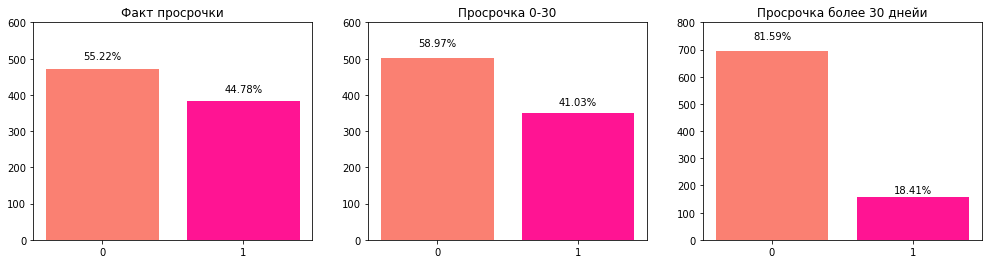

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(17, 4))

flag = df['Факт просрочки'].value_counts(dropna=False)
perc_1 = 100 * flag[1] / (flag[0] + flag[1])
perc_1 = float(f"{perc_1:.{2}f}")
perc_0 = 100 - perc_1
bar_label = [str(perc_1) + '%', str(perc_0) + '%']
bar_plot = ax[0].bar([0,1], flag, tick_label=['0', '1'], color=['salmon', 'deeppink'])
for idx, rect in enumerate(bar_plot):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2., 1.05*height,
            bar_label[idx],
            ha='center', va='bottom', rotation=0)
ax[0].set_title('Факт просрочки')
ax[0].set_ylim([0, 600])

flag = df['Просрочка 0-30'].value_counts(dropna=False)
perc_1 = 100 * flag[1] / (flag[0] + flag[1])
perc_1 = float(f"{perc_1:.{2}f}")
perc_0 = 100 - perc_1
bar_label = [str(perc_1) + '%', str(perc_0) + '%']
bar_plot = ax[1].bar([0,1], flag, tick_label=['0', '1'], color=['salmon', 'deeppink'])
for idx, rect in enumerate(bar_plot):
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width()/2., 1.05*height,
            bar_label[idx],
            ha='center', va='bottom', rotation=0)
ax[1].set_title('Просрочка 0-30')
ax[1].set_ylim([0, 600])

flag = df['Просрочка более 30 дней'].value_counts(dropna=False)
perc_1 = 100 * flag[1] / (flag[0] + flag[1])
perc_1 = float(f"{perc_1:.{2}f}")
perc_0 = 100 - perc_1
bar_label = [str(perc_0) + '%', str(perc_1) + '%']
bar_plot = ax[2].bar([0,1], flag, tick_label=['0', '1'], color=['salmon', 'deeppink'])
for idx, rect in enumerate(bar_plot):
    height = rect.get_height()
    ax[2].text(rect.get_x() + rect.get_width()/2., 1.05*height,
            bar_label[idx],
            ha='center', va='bottom', rotation=0)
ax[2].set_title('Просрочка более 30 днейи')
ax[2].set_ylim([0, 800])
plt.show()

С течением времени в среднем растет как дебеторская, так и кредиторская задолженности:

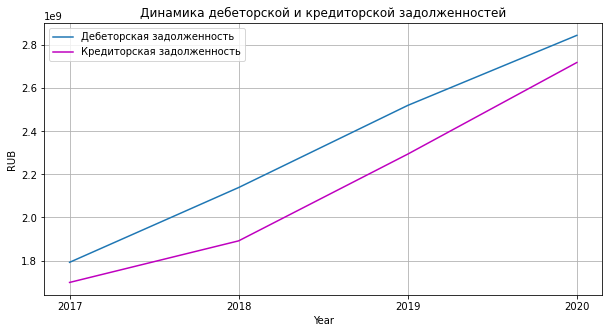

In [4]:
plt.figure(figsize=(10, 5))
df[['Y-4, Дебиторская задолженность, RUB',
'Y-3, Дебиторская задолженность, RUB',
'Y-2, Дебиторская задолженность, RUB',
'Y-1, Дебиторская задолженность, RUB']].mean().plot(label='Дебеторская задолженность')
df[['Y-4, Кредиторская задолженность, RUB',
'Y-3, Кредиторская задолженность, RUB',
'Y-2, Кредиторская задолженность, RUB',
'Y-1, Кредиторская задолженность, RUB']].mean().plot(color='m', label='Кредиторская задолженность')
plt.grid(True)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3], labels=['2017', '2018', '2019', '2020']);
plt.ylabel('RUB')
plt.xlabel('Year')
plt.title('Динамика дебеторской и кредиторской задолженностей');

Определим, как значение суммы факторов связано с остальными фичами:
* построим распределение суммы факторов
* категоризуем эту фичу

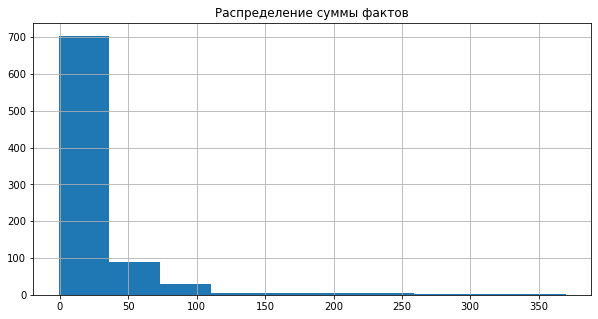

In [5]:
plt.figure(figsize=(10, 5))
df['Итого'].hist()
plt.title('Распределение суммы фактов');

In [6]:
def category(x):
    if x >= 0 and x < 10:
        return 'Итого_0_10'
    elif x >= 10 and x < 20:
        return 'Итого_10_20'
    elif x >= 20 and x <= 30:
        return 'Итого_20_30'
    elif x >= 30 and x < 100:
        return 'Итого_30_100'
    else:
        return 'Итого_100+'

df['Итого_category'] = df['Итого'].apply(lambda x: category(x))

Рассмотрим по категориям распределения таргетов:

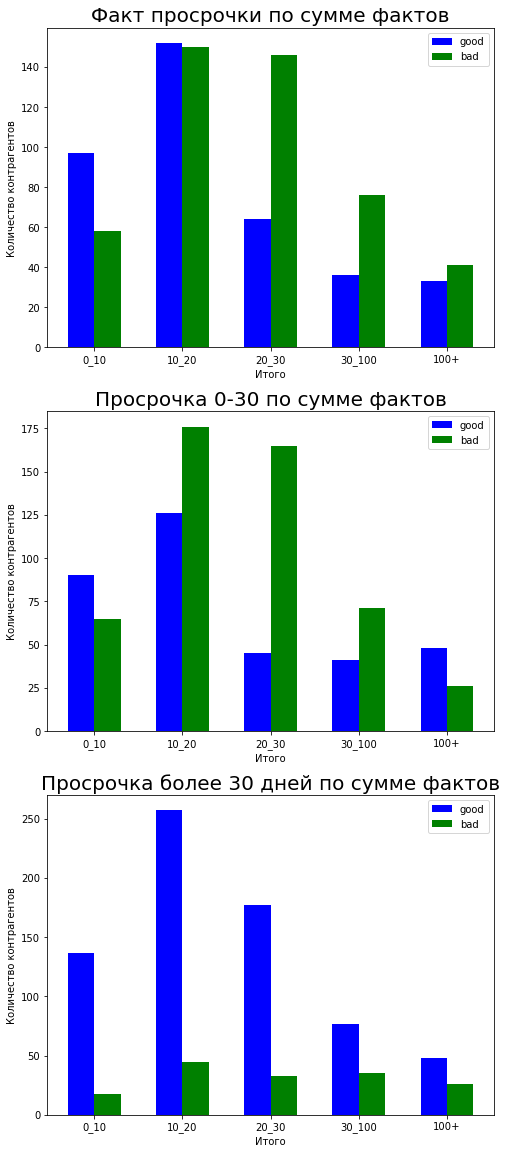

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(8, 20))

summary = ['0_10', '10_20', '20_30', '30_100', '100+']
index = np.arange(5)
values1 = []
values2 = []

for i in summary:
    values1.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Факт просрочки'] == 0)].shape[0])
    values2.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Факт просрочки'] == 1)].shape[0])
bw = 0.3
ax[0].set_title('Факт просрочки по сумме фактов', fontsize=20)
ax[0].bar(index, values1, bw, color='b', label='good')
ax[0].bar(index+bw, values2, bw, color='g', label='bad')
ax[0].set_xticks(index+0.15)
ax[0].set_xticklabels(summary)
ax[0].set_xlabel('Итого')
ax[0].set_ylabel('Количество контрагентов')
ax[0].legend()


values1 = []
values2 = []

for i in summary:
    values1.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Просрочка 0-30'] == 0)].shape[0])
    values2.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Просрочка 0-30'] == 1)].shape[0])
bw = 0.3
ax[1].set_title('Просрочка 0-30 по сумме фактов', fontsize=20)
ax[1].bar(index, values1, bw, color='b', label='good')
ax[1].bar(index+bw, values2, bw, color='g', label='bad')
ax[1].set_xticks(index+0.15)
ax[1].set_xticklabels(summary)
ax[1].set_xlabel('Итого')
ax[1].set_ylabel('Количество контрагентов')
ax[1].legend()

values1 = []
values2 = []

for i in summary:
    values1.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Просрочка более 30 дней'] == 0)].shape[0])
    values2.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Просрочка более 30 дней'] == 1)].shape[0])
bw = 0.3
ax[2].set_title('Просрочка более 30 дней по сумме фактов', fontsize=20)
ax[2].bar(index, values1, bw, color='b', label='good')
ax[2].bar(index+bw, values2, bw, color='g', label='bad')
ax[2].set_xticks(index+0.15)
ax[2].set_xticklabels(summary)
ax[2].set_xlabel('Итого')
ax[2].set_ylabel('Количество контрагентов')
ax[2].legend();

Видим, что:
* просрочка более 30 дней встречается реже, чем от 0 до 30 дней
* группы с суммой факторов от 10 до 30, по имеющимся данным, чаще других имеют просрочку

Распредедение факта просрочки по колонке Итого:

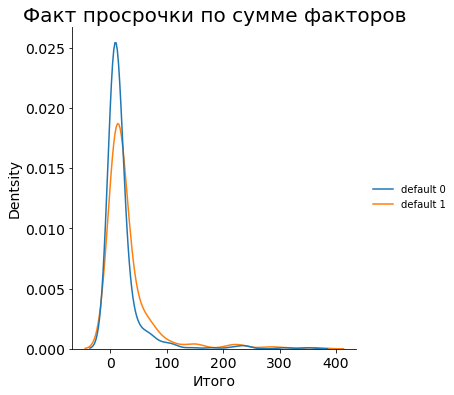

In [8]:
sns.displot(
    {
        "default 0": df[df['Факт просрочки'] == 0]['Итого'],
        "default 1": df[df['Факт просрочки'] == 1]['Итого']
    },
    kind="kde",
    common_norm=False # независимая нормализация каждого подмножества
)

plt.title('Факт просрочки по сумме факторов', fontsize=20)
plt.xlabel('Итого', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Сопоставим кредиторскую и дебеторскую задолженности в среднем за последние два года:

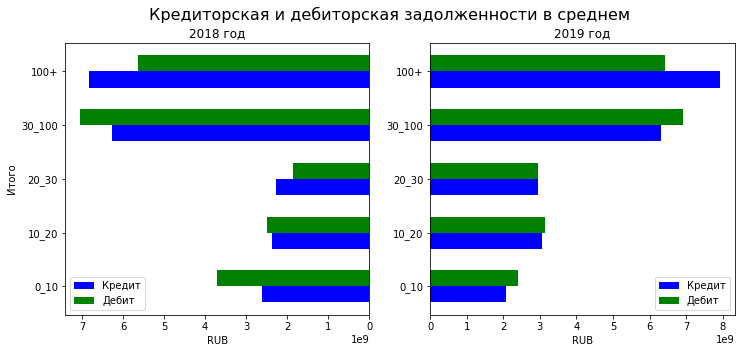

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
summary = ['0_10', '10_20', '20_30', '30_100', '100+']

index = np.arange(5)
values1 = []
values2 = []

for i in summary:
    values1.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Факт просрочки'] == 1)]['Y-2, Кредиторская задолженность, RUB'].mean())
    values2.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Факт просрочки'] == 1)]['Y-2, Дебиторская задолженность, RUB'].mean())
bw = 0.3
ax[0].barh(index, values1, bw, color='b', label='Кредит')
ax[0].barh(index+bw, values2, bw, color='g', label='Дебит')
ax[0].set_title('2018 год')
ax[0].set_yticks(index+0.15)
ax[0].set_yticklabels(summary)
ax[0].set_ylabel('Итого')
ax[0].set_xlabel('RUB')
ax[0].invert_xaxis()
ax[0].legend()

values1 = []
values2 = []

for i in summary:
    values1.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Факт просрочки'] == 1)]['Y-1, Кредиторская задолженность, RUB'].mean())
    values2.append(df[(df['Итого_category'] == f"Итого_{i}") & (df['Факт просрочки'] == 1)]['Y-1, Дебиторская задолженность, RUB'].mean())
bw = 0.3
ax[1].barh(index, values1, bw, color='b', label='Кредит')
ax[1].barh(index+bw, values2, bw, color='g', label='Дебит')
ax[1].set_title('2019 год')
ax[1].set_yticks(index+0.15)
ax[1].set_yticklabels(summary)
ax[1].set_xlabel('RUB')
ax[1].legend()


fig.suptitle('Кредиторская и дебиторская задолженности в среднем', fontsize=16);

Отметим тенденцию: контрагенты с большей суммой факторов (от 30 и выше) оперируют более крупными суммами

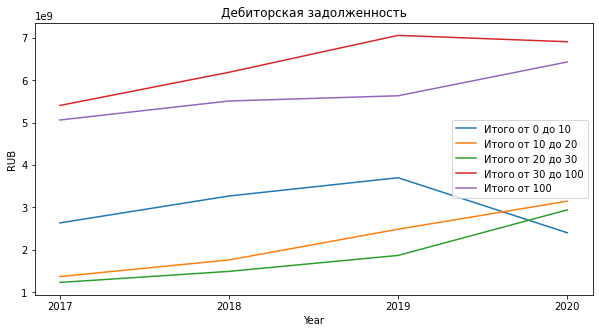

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df[(df['Итого_category'] == f"Итого_0_10") & (df['Факт просрочки'] == 1)][['Y-4, Дебиторская задолженность, RUB',
'Y-3, Дебиторская задолженность, RUB',
'Y-2, Дебиторская задолженность, RUB',
'Y-1, Дебиторская задолженность, RUB']].mean(), label='Итого от 0 до 10')
plt.plot(df[(df['Итого_category'] == f"Итого_10_20") & (df['Факт просрочки'] == 1)][['Y-4, Дебиторская задолженность, RUB',
'Y-3, Дебиторская задолженность, RUB',
'Y-2, Дебиторская задолженность, RUB',
'Y-1, Дебиторская задолженность, RUB']].mean(), label='Итого от 10 до 20')
plt.plot(df[(df['Итого_category'] == f"Итого_20_30") & (df['Факт просрочки'] == 1)][['Y-4, Дебиторская задолженность, RUB',
'Y-3, Дебиторская задолженность, RUB',
'Y-2, Дебиторская задолженность, RUB',
'Y-1, Дебиторская задолженность, RUB']].mean(), label='Итого от 20 до 30')
plt.plot(df[(df['Итого_category'] == f"Итого_30_100") & (df['Факт просрочки'] == 1)][['Y-4, Дебиторская задолженность, RUB',
'Y-3, Дебиторская задолженность, RUB',
'Y-2, Дебиторская задолженность, RUB',
'Y-1, Дебиторская задолженность, RUB']].mean(), label='Итого от 30 до 100')
plt.plot(df[(df['Итого_category'] == f"Итого_100+") & (df['Факт просрочки'] == 1)][['Y-4, Дебиторская задолженность, RUB',
'Y-3, Дебиторская задолженность, RUB',
'Y-2, Дебиторская задолженность, RUB',
'Y-1, Дебиторская задолженность, RUB']].mean(), label='Итого от 100')

plt.ylabel('RUB')
plt.title('Дебиторская задолженность')
plt.xlabel('Year')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3], labels=['2017', '2018', '2019', '2020']);

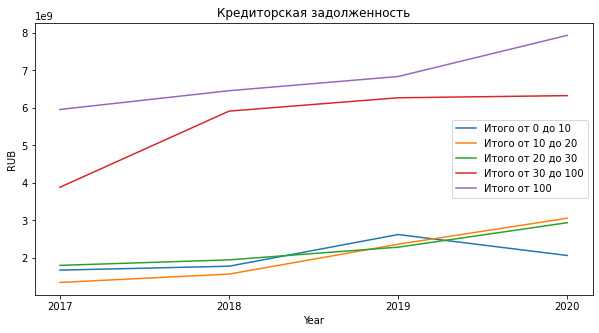

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df[(df['Итого_category'] == f"Итого_0_10") & (df['Факт просрочки'] == 1)][['Y-4, Кредиторская задолженность, RUB',
'Y-3, Кредиторская задолженность, RUB',
'Y-2, Кредиторская задолженность, RUB',
'Y-1, Кредиторская задолженность, RUB']].mean(), label='Итого от 0 до 10')
plt.plot(df[(df['Итого_category'] == f"Итого_10_20") & (df['Факт просрочки'] == 1)][['Y-4, Кредиторская задолженность, RUB',
'Y-3, Кредиторская задолженность, RUB',
'Y-2, Кредиторская задолженность, RUB',
'Y-1, Кредиторская задолженность, RUB']].mean(), label='Итого от 10 до 20')
plt.plot(df[(df['Итого_category'] == f"Итого_20_30") & (df['Факт просрочки'] == 1)][['Y-4, Кредиторская задолженность, RUB',
'Y-3, Кредиторская задолженность, RUB',
'Y-2, Кредиторская задолженность, RUB',
'Y-1, Кредиторская задолженность, RUB']].mean(), label='Итого от 20 до 30')
plt.plot(df[(df['Итого_category'] == f"Итого_30_100") & (df['Факт просрочки'] == 1)][['Y-4, Кредиторская задолженность, RUB',
'Y-3, Кредиторская задолженность, RUB',
'Y-2, Кредиторская задолженность, RUB',
'Y-1, Кредиторская задолженность, RUB']].mean(), label='Итого от 30 до 100')
plt.plot(df[(df['Итого_category'] == f"Итого_100+") & (df['Факт просрочки'] == 1)][['Y-4, Кредиторская задолженность, RUB',
'Y-3, Кредиторская задолженность, RUB',
'Y-2, Кредиторская задолженность, RUB',
'Y-1, Кредиторская задолженность, RUB']].mean(), label='Итого от 100')

plt.ylabel('RUB')
plt.title('Кредиторская задолженность')
plt.xlabel('Year')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3], labels=['2017', '2018', '2019', '2020']);

По приведенным выше графикам видно, что контрагенты можно кластеризовать на две группы:
* по сумме факторов от 0 до 30 - предположительно мелкие и средние контрагенты
* по сумме факторов 30+ - предположительно крупные контрагенты

Возможно, есть смысл строить две отдельные модели для этих групп

Также для более высокого качества моделирования отметим несколько предложений к данным:
* разбивка данных хотя бы по месяцам, а не по годам
* добавить фичи, такие как даты и сумма платежей (от них можно было бы сгенерить такие фичи как: количество дней между платежами, процент платежа от общего долга, если сумма платежа не фиксирована)
* сколько по времени существует контрагент
* география/локация контрагентов
